# Final Project Script

**Name:** Ryan Baig

**Due:** Sunday, 5/18

---

***IMPORTANT: Run this code under an anaconda3 environment, as a custom one does not properly load in the package***

---

In [4]:
!pip install astropy-healpix
!pip install dask 
!pip install zarr
!pip install fsspec

!pip install reproject

import numpy as np
import scipy


In [5]:
import reproject
print(reproject.__version__)

0.14.1


Text(0.5, 1.0, 'MSX band E')

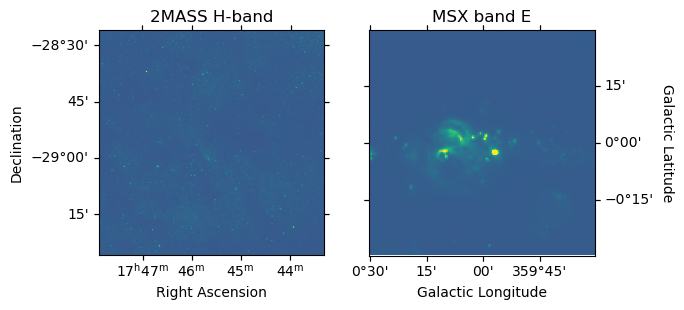

In [6]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

hdu1 = fits.open(get_pkg_data_filename('gc_2mass_h.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('galactic_center/gc_msx_e.fits'))[0]

from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS H-band')


ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')


In [7]:
from reproject import reproject_interp
array, footprint = reproject_interp(hdu2, hdu1.header)

Text(0.5, 1.0, 'MSX band E image footprint')

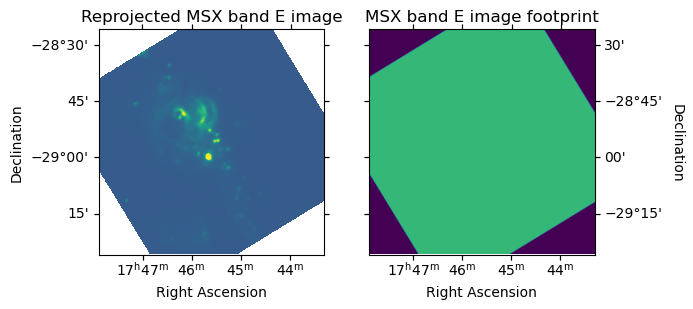

In [8]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected MSX band E image')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('MSX band E image footprint')